In [1]:
import pandas as pd
import numpy as np                          
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cell_df = pd.read_csv("mtn.csv")
cell_df.head()

,Gender,Age,Your Feeling,Failure,Happy,Irritated,Sleep,Suicide,Medication,Think,Appertite,Decision
0,2,18,5,1,2,2,3,3,1,1,1,2
1,2,18,5,2,3,2,2,2,2,1,2,3
2,1,18,1,2,2,1,2,2,3,2,3,2
3,1,19,5,1,2,1,2,3,3,2,2,3
4,2,20,5,1,2,2,3,3,3,1,1,2


In [3]:
cell_df.shape

(928, 12)

In [4]:
cell_df.size

11136

In [25]:
cell_df['Your Feeling'].value_counts()

8    320
5    192
1    160
4     96
2     64
7     32
6     32
3     32
Name: Your Feeling, dtype: int64

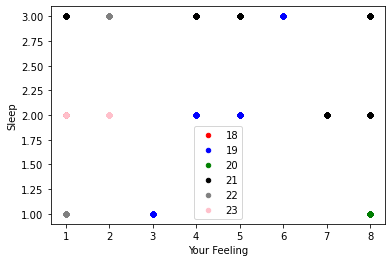

In [37]:
age_df = cell_df[cell_df['Age'] ==18]
age1_df = cell_df[cell_df['Age'] ==19]
age2_df = cell_df[cell_df['Age'] ==20]
age3_df = cell_df[cell_df['Age'] ==21]
age4_df = cell_df[cell_df['Age'] ==22]
age5_df = cell_df[cell_df['Age'] ==23]


axes = age_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='red', label='18')
axes = age1_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='blue', label='19', ax=axes)
axes = age2_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='green', label='20', ax=axes)
axes = age3_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='black', label='21', ax=axes)
axes = age4_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='grey', label='22', ax=axes)
axes = age5_df.plot(kind='scatter', x='Your Feeling', y='Sleep', color='pink', label='23', ax=axes)

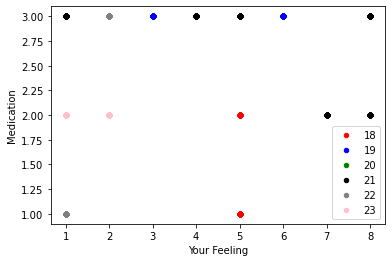

In [35]:
age_df = cell_df[cell_df['Age'] ==18]
age1_df = cell_df[cell_df['Age'] ==19]
age2_df = cell_df[cell_df['Age'] ==20]
age3_df = cell_df[cell_df['Age'] ==21]
age4_df = cell_df[cell_df['Age'] ==22]
age5_df = cell_df[cell_df['Age'] ==23]


axes = age_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='red', label='18')
axes = age1_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='blue', label='19', ax=axes)
axes = age2_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='green', label='20', ax=axes)
axes = age3_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='black', label='21', ax=axes)
axes = age4_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='grey', label='22', ax=axes)
axes = age5_df.plot(kind='scatter', x='Your Feeling', y='Medication', color='pink', label='23', ax=axes)

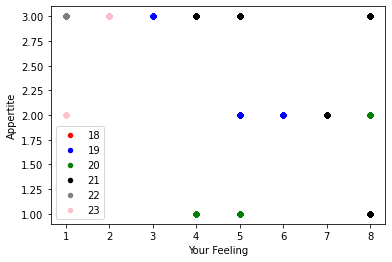

In [36]:
age_df = cell_df[cell_df['Age'] ==18]
age1_df = cell_df[cell_df['Age'] ==19]
age2_df = cell_df[cell_df['Age'] ==20]
age3_df = cell_df[cell_df['Age'] ==21]
age4_df = cell_df[cell_df['Age'] ==22]
age5_df = cell_df[cell_df['Age'] ==23]

axes = age_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='red', label='18')
axes = age1_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='blue', label='19', ax=axes)
axes = age2_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='green', label='20', ax=axes)
axes = age3_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='black', label='21', ax=axes)
axes = age4_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='grey', label='22', ax=axes)
axes = age5_df.plot(kind='scatter', x='Your Feeling', y='Appertite', color='pink', label='23', ax=axes)

In [28]:
cell_df.columns

Index(['Gender', 'Age', 'Your Feeling', 'Failure', 'Happy', 'Irritated',
       'Sleep', 'Suicide', 'Medication', 'Think', 'Appertite', 'Decision'],
      dtype='object')

In [8]:
feature_df = cell_df[['Irritated', 'Sleep', 'Suicide', 'Medication', 
                      'Think', 'Appertite', 'Decision']]

In [9]:
#independent var
X = np.asarray(feature_df)

In [10]:
X[0:5]

array([[2, 3, 3, 1, 1, 1, 2],
       [2, 2, 2, 2, 1, 2, 3],
       [1, 2, 2, 3, 2, 3, 2],
       [1, 2, 3, 3, 2, 2, 3],
       [2, 3, 3, 3, 1, 1, 2]], dtype=int64)

In [11]:
#dependent var
y = np.asarray(cell_df['Happy'])

In [12]:
y[0:5]

array([2, 3, 2, 2, 2], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=4)
X_train.shape

(185, 7)

In [14]:
y_train.shape

(185,)

In [15]:
X_test.shape

(743, 7)

In [16]:
y_test.shape

(743,)

In [38]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=3)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.46      1.00      0.63        25
           2       0.85      0.89      0.87       512
           3       0.63      0.47      0.53       206

    accuracy                           0.78       743
   macro avg       0.65      0.78      0.68       743
weighted avg       0.77      0.78      0.77       743



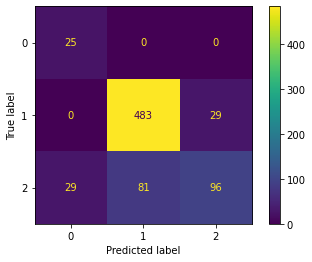

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()